# Logistic Regression

In [66]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Separating the data and training the model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#Checking the Confusion Matrx and the accuracy
from sklearn import metrics
print("No Error")

No Error


In [67]:
# Importing the Dataset.
dataset = pd.read_csv(r"C:\Users\Dell\Desktop\ML_pdf\Covid Data.csv")
dataset

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1012164,2,13,2,1,9999-99-99,97,2,40,97,2,...,2,2,2,2,2,2,2,2,7,97
1012165,1,13,2,2,9999-99-99,2,2,51,97,2,...,2,2,1,2,2,2,2,2,7,2
1012166,2,13,2,1,9999-99-99,97,2,55,97,2,...,2,2,2,2,2,2,2,2,7,97
1012167,2,13,2,1,9999-99-99,97,2,28,97,2,...,2,2,2,2,2,2,2,2,7,97


# Data Pre-Processing

In [68]:
dataset.describe()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
count,1.012169e+06,1.012169e+06,1.012169e+06,1.012169e+06,1.012169e+06,1.012169e+06,1.012169e+06,1.012169e+06,1.012169e+06,1.012169e+06,1.012169e+06,1.012169e+06,1.012169e+06,1.012169e+06,1.012169e+06,1.012169e+06,1.012169e+06,1.012169e+06,1.012169e+06,1.012169e+06
mean,1.630085e+00,8.871961e+00,1.499620e+00,1.194346e+00,7.920170e+01,3.398131e+00,4.180730e+01,4.978976e+01,2.192251e+00,2.266862e+00,2.248983e+00,2.304952e+00,2.133896e+00,2.437854e+00,2.267560e+00,2.131681e+00,2.263214e+00,2.220315e+00,5.388583e+00,7.923408e+01
std,4.827818e-01,3.744556e+00,5.000001e-01,3.956966e-01,3.712995e+01,1.212200e+01,1.695245e+01,4.751046e+01,5.478263e+00,5.192156e+00,5.174358e+00,5.523969e+00,5.285446e+00,6.671274e+00,5.249325e+00,5.231476e+00,5.194465e+00,5.381423e+00,1.862252e+00,3.708277e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,3.000000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,9.700000e+01
50%,2.000000e+00,1.200000e+01,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,4.000000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,6.000000e+00,9.700000e+01
75%,2.000000e+00,1.200000e+01,2.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,5.300000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,7.000000e+00,9.700000e+01
max,2.000000e+00,1.300000e+01,2.000000e+00,2.000000e+00,9.900000e+01,9.900000e+01,1.210000e+02,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,7.000000e+00,9.900000e+01


In [69]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1012169 entries, 0 to 1012168
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1012169 non-null  int64 
 1   MEDICAL_UNIT          1012169 non-null  int64 
 2   SEX                   1012169 non-null  int64 
 3   PATIENT_TYPE          1012169 non-null  int64 
 4   DATE_DIED             1012169 non-null  object
 5   INTUBED               1012169 non-null  int64 
 6   PNEUMONIA             1012169 non-null  int64 
 7   AGE                   1012169 non-null  int64 
 8   PREGNANT              1012169 non-null  int64 
 9   DIABETES              1012169 non-null  int64 
 10  COPD                  1012169 non-null  int64 
 11  ASTHMA                1012169 non-null  int64 
 12  INMSUPR               1012169 non-null  int64 
 13  HIPERTENSION          1012169 non-null  int64 
 14  OTHER_DISEASE         1012169 non-null  int64 
 15

In [70]:
dataset.shape

(1012169, 21)

In [71]:
dataset.isnull().sum()

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
dtype: int64

# Spilt the dataset

In [86]:
dataset.corr()

C:\Users\Dell\AppData\Local\Temp\ipykernel_22296\2191645083.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset.corr()


,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
USMER,1.000000,0.127968,-0.001104,-0.189675,0.174176,-0.157163,-0.044846,-0.001724,0.014983,0.011500,0.011234,0.003757,0.015034,-0.014557,0.010664,0.014929,0.012139,0.010993,0.035750,0.173605
MEDICAL_UNIT,0.127968,1.000000,0.002122,-0.202538,0.202705,-0.043469,-0.083821,0.005885,0.020803,0.015480,0.014579,0.013036,0.022170,0.028514,0.015601,0.020989,0.015992,0.013443,0.120425,0.202626
SEX,-0.001104,0.002122,1.000000,0.090800,-0.091200,-0.012400,0.029241,0.992927,0.009125,0.009591,0.010573,0.008181,0.009374,0.009288,0.008343,0.010018,0.008465,0.005162,-0.061393,-0.091100
PATIENT_TYPE,-0.189675,-0.202538,0.090800,1.000000,-0.975980,0.022525,0.319254,0.089711,0.008464,0.019047,0.022608,0.024531,0.006369,0.035850,0.021583,0.019197,0.018241,0.021701,-0.202149,-0.975444
INTUBED,0.174176,0.202705,-0.091200,-0.975980,1.000000,0.081254,-0.322082,-0.089408,-0.008951,-0.019638,-0.023025,-0.023739,-0.007159,-0.034475,-0.021857,-0.019777,-0.018688,-0.022015,0.211725,0.999422
PNEUMONIA,-0.157163,-0.043469,-0.012400,0.022525,0.081254,1.000000,-0.074235,-0.007440,-0.004648,-0.005790,-0.005564,-0.000943,-0.004946,0.001637,-0.004911,-0.004448,-0.005450,-0.004477,0.072066,0.081200
AGE,-0.044846,-0.083821,0.029241,0.319254,-0.322082,-0.074235,1.000000,0.028097,0.004733,0.019328,0.022966,0.023108,-0.004564,0.022788,0.019793,0.015742,0.020362,0.021488,-0.160307,-0.321949
PREGNANT,-0.001724,0.005885,0.992927,0.089711,-0.089408,-0.007440,0.028097,1.000000,0.014899,0.015866,0.016867,0.014410,0.015410,0.014446,0.014501,0.015963,0.014553,0.010983,-0.061150,-0.089301
DIABETES,0.014983,0.020803,0.009125,0.008464,-0.008951,-0.004648,0.004733,0.014899,1.000000,0.830081,0.831125,0.783304,0.835918,0.641152,0.811804,0.754270,0.814149,0.773454,-0.006279,-0.008961
COPD,0.011500,0.015480,0.009591,0.019047,-0.019638,-0.005790,0.019328,0.015866,0.830081,1.000000,0.909375,0.853212,0.857674,0.693110,0.881498,0.815057,0.884466,0.837094,-0.012247,-0.019662


In [99]:
# #creating series of the dataset
X = dataset[['ASTHMA']]
y = dataset['CLASIFFICATION_FINAL']

In [102]:
X_train , X_test , y_train , y_test = train_test_split (X , y , test_size = 0.3,train_size=0.7 , random_state = 42)

In [109]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [110]:
y_pred = logreg.predict(X_test)
y_pred  

array([7, 7, 7, ..., 7, 7, 7], dtype=int64)

In [111]:
print ("Accuracy is: " , metrics.accuracy_score (y_test , y_pred))

Accuracy is:  0.4922098066530326


In [112]:
logreg.intercept_

array([-1.55444363, -3.13456997,  2.17473918, -0.80269598, -0.41649347,
        1.17705946,  2.5564044 ])

In [113]:
logreg.coef_

array([[ 0.12989498],
       [ 0.13988526],
       [ 0.11961288],
       [-0.74674823],
       [ 0.12153013],
       [ 0.12135921],
       [ 0.11446576]])

In [114]:
from sklearn.metrics import confusion_matrix
#Confusion Metrics
cm = confusion_matrix(y_test,y_pred)
cm

array([[     0,      0,     20,      0,      0,      0,   2619],
       [     0,      0,     13,      0,      0,      0,    531],
       [     0,      0,    352,      0,      0,      0, 103210],
       [     0,      0,      3,      0,      0,      0,    972],
       [     0,      0,     44,      0,      0,      0,   7825],
       [     0,      0,    138,      0,      0,      0,  38484],
       [     0,      0,    332,      0,      0,      0, 149108]],
      dtype=int64)

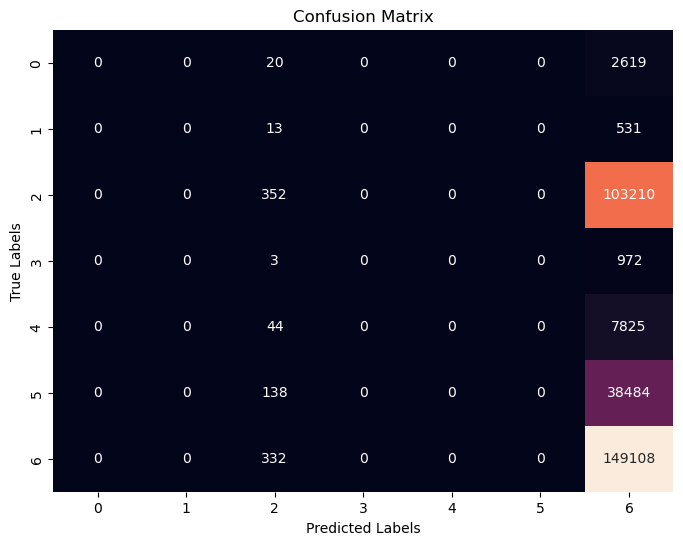

In [115]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [98]:
from sklearn.metrics import precision_recall_fscore_support
precision, recall, f1_score,_ = precision_recall_fscore_support(y_test, y_pred)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)

Precision: [0.         0.04444444 0.58155942 0.         0.         0.57927721
 0.52746212]
Recall: [0.         0.00367647 0.23161971 0.         0.         0.07179846
 0.90912741]
F1 Score: [0.         0.00679117 0.33129385 0.         0.         0.12776152
 0.66759538]


C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
